In [1]:
import tobler
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
blocks = geopandas.read_file("C:\Research Data\GIS DATA\VA_blck_grp_1990.shp")

<AxesSubplot:>

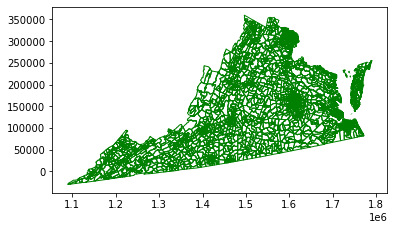

In [3]:
blocks.plot(facecolor='none',edgecolor='g')

In [4]:
MI= geopandas.read_file("C:\Research Data\GIS DATA\VirginiaMegaMap\Mapping inequality data\VARoanoke1937\cartodb-query.shp")

<AxesSubplot:>

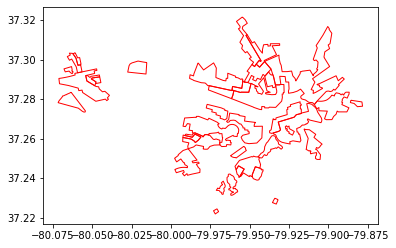

In [5]:
MI.plot(facecolor='none',edgecolor='r')

In [6]:
estimates = tobler.area_weighted.area_interpolate(blocks, MI, intensive_variables=['EZL002'])

Source and target dataframes have different crs. Please correct.


In [7]:
blocks= blocks.to_crs(MI.crs)

In [8]:
estimates = tobler.area_weighted.area_interpolate(blocks, MI, intensive_variables=['EZL002'])

C:\Users\Desktop\AppData\Local\Temp\ipykernel_24164\653712021.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  estimates = tobler.area_weighted.area_interpolate(blocks, MI, intensive_variables=['EZL002'])
C:\Users\Desktop\anaconda3\envs\tobler\lib\site-packages\tobler\area_weighted\area_interpolate.py:362: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  den = source_df[source_df.geometry.name].area.values


C:\Users\Desktop\anaconda3\envs\tobler\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\Desktop\anaconda3\envs\tobler\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 8
  Warn("Warning: setting k to %d" % k_q, UserWarning)


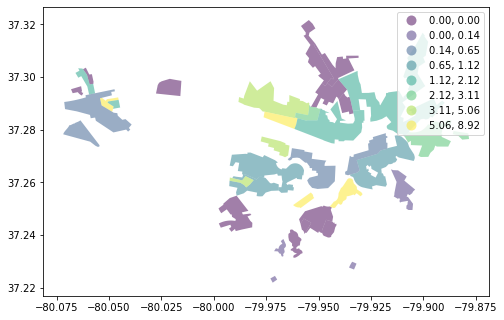

In [9]:
MI['EZL002'] = estimates['EZL002']
f, ax = plt.subplots(1, figsize=(8, 8))
ax = MI.plot(column='EZL002', ax=ax, legend=True, alpha=0.5, scheme='Quantiles', k=10)
plt.show()

In [10]:
estimates.to_file('Roanoke_Pycno.shp')

In [11]:
import tobler